Homework 4: Sentiment Analysis - Task 4
----

Names
----
Names: __Jalen Wu, Jonathan Zhang__ 

Task 4: Neural Networks (20 points)
----

Next, we'll train a feedforward neural net to work with this data. You'll train one neural net which takes the same input as your Logistic Regression model - a sparse vector representing documents as bags of words.

Take a look at these videos to understand forward and backward propagation in neural networks - 
* https://www.youtube.com/watch?v=HHbjpDHcJVw
* https://youtu.be/-Lavz_I4l2U?si=zi20DB3qKPLMEPt1
  
**10 points in Task 5 will be allocated for all 9 graphs (including the one generated here in Task 4 for Neural Networks) being:**
- Legible
- Present below
- Properly labeled
     - x and y axes labeled
     - Legend for accuracy measures plotted
     - Plot Title with which model and run number the graph represents

In [1]:
import sentiment_utils as sutils
import numpy as np

from keras.models import Sequential
from keras.layers import Dense

# you can experiment with having some Dropout layers if you'd like to
# this is not required
from keras.layers import Dropout

# if you want to use this again
from sklearn.feature_extraction.text import CountVectorizer

from nltk.metrics.scores import (precision, recall, f_measure, accuracy)
import matplotlib.pyplot as plt


[nltk_data] Downloading package punkt to /Users/jalenwu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# define constants for the files we are using
TRAIN_FILE = "movie_reviews_train.txt"
DEV_FILE = "movie_reviews_dev.txt"

# load in your data and make sure you understand the format
# Do not print out too much so as to impede readability of your notebook
train_tups = sutils.generate_tuples_from_file(TRAIN_FILE)
dev_tups = sutils.generate_tuples_from_file(DEV_FILE)
train_tokens, train_labels = train_tups
dev_tokens, dev_labels = dev_tups

In [3]:
# you may use either your sparse vectors or sklearn's CountVectorizer's sparse vectors
# you will experiment with multinomial and binarized representations later

corpus = []
for i in range(len(train_tokens)):
    corpus.append(" ".join(train_tokens[i]))

vectorizer = CountVectorizer(binary=True) # takes in list of words and returns a sparse matrix
X = vectorizer.fit_transform(corpus)
print(X[:1])

  (0, 21419)	1
  (0, 5682)	1
  (0, 13410)	1
  (0, 4816)	1
  (0, 22233)	1
  (0, 6652)	1
  (0, 1487)	1
  (0, 20116)	1
  (0, 12738)	1
  (0, 14017)	1
  (0, 20201)	1
  (0, 12061)	1
  (0, 15261)	1
  (0, 7634)	1
  (0, 1392)	1
  (0, 10217)	1
  (0, 7042)	1
  (0, 18259)	1
  (0, 10254)	1
  (0, 10664)	1
  (0, 20385)	1
  (0, 1917)	1
  (0, 9656)	1
  (0, 917)	1
  (0, 16173)	1
  :	:
  (0, 17009)	1
  (0, 2964)	1
  (0, 4665)	1
  (0, 2337)	1
  (0, 13297)	1
  (0, 22148)	1
  (0, 9923)	1
  (0, 19011)	1
  (0, 10144)	1
  (0, 12226)	1
  (0, 21720)	1
  (0, 22345)	1
  (0, 19150)	1
  (0, 2977)	1
  (0, 7033)	1
  (0, 7430)	1
  (0, 8024)	1
  (0, 17839)	1
  (0, 17481)	1
  (0, 1960)	1
  (0, 20154)	1
  (0, 1153)	1
  (0, 995)	1
  (0, 1194)	1
  (0, 6189)	1


In [4]:
# Create a feedforward neural network model
# that takes a sparse BoW representation of the data as input
# and makes a binary classification of positive/negative sentiment as output
# you may use any number of hidden layers >= 1 and any number of units in each hidden layer (we recommend between 50-200)
# you may use any activation function on the hidden layers 
# you should use a sigmoid activation function on the output layer
# you should use binary cross-entropy as your loss function
# sgd is an appropriate optimizer for this task
# you should report accuracy as your metric
# you may add Dropout layers if you'd like to

# create/compile your model in this cell

model = Sequential()

# Input layer
model.add(Dense(units = 100, input_dim=X.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(units = 150, activation='relu'))
model.add(Dense(units = 200, activation='relu'))

# Output layer
model.add(Dense(units = 1, activation='sigmoid'))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
# call compile here

model.summary()


/Users/jalenwu/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │     2,259,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        15,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 200)            │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,305,251 (8.79 MB)

 Trainable params: 2,305,251 (8.79 MB)

 Non-trainable params: 0 (0.00 B)

How many trainable parameters does your model have? __2,305,251__

In [5]:
# train your model
# reports an accuracy of 0.78 at that point using the sgd optimizer
# Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'int'>"})
# indicates you should change a list into a numpy array

model.fit(X.toarray(), np.array(train_labels), epochs=50)

# accuracy: 1.0000 - loss: 0.0200

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5241 - loss: 0.6928
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5748 - loss: 0.6897
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6484 - loss: 0.6857
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6805 - loss: 0.6803
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7318 - loss: 0.6726
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8069 - loss: 0.6602
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8102 - loss: 0.6444
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8344 - loss: 0.6185
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8500 - loss: 0.5866
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8757 - loss: 0.5314
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8918 - loss: 0.4742
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy:

In [6]:
# make a prediction on the dev set
# then make a classification decision based on that prediction

corpus_dev = []
for i in range(len(dev_tokens)):
    corpus_dev.append(" ".join(dev_tokens[i]))

X_dev = vectorizer.transform(corpus_dev)

preds = model.predict(X_dev.toarray())
preds = np.array(preds)

# To convert the predicted probabilities to binary labels.
for i in range(len(preds)):
    if preds[i] < 0.5:
        preds[i] = 0
    else:
        preds[i] = 1

print(preds.shape)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
(200, 1)


In [7]:
# use the model.evaluate function to report the loss and accuracy on the dev set
model.evaluate(X_dev.toarray(), np.array(dev_labels))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7371 - loss: 0.6924  


[0.6218985319137573, 0.7749999761581421]

In [10]:
# create the same graph as with NB and LR, with your neural network model instead!
# make sure to re-create your model each time you train it — you don't want to start with
# an already trained network!
# you should experiment with different numbers of epochs to see how performance varies
# you need not create an experiment that takes > 10 min to run (gradescope will run out of computing resources and give you a 0)

# x-axis: percentage of training data
# y-axis: performance of the classifier on the dev set
# 4 lines: precision, recall, f1, accuracy

training_data = []
for i in range(1, 11):
    end_index = int(len(train_tokens) * i / 10)
    training_data.append((train_tokens[:end_index], train_labels[:end_index]))

eval_data = []

count = 1
for d in training_data: # for each entry in the subset (sentence, label)

    corpus = []
    for i in range(len(d[0])):
        corpus.append(" ".join(d[0][i]))

    vectorizer = CountVectorizer() # takes in list of words and returns a sparse matrix
    X = vectorizer.fit_transform(corpus) # X is used to train the model.
    
    model = Sequential()
  
    model.add(Dense(units = 100, input_dim=X.shape[1], activation='relu'))  # Input layer

    # Hidden layers
    model.add(Dense(units = 150, activation='relu'))
    model.add(Dense(units = 200, activation='relu'))

    model.add(Dense(units = 1, activation='sigmoid')) # Output layer

    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
    
    model.fit(X.toarray(), np.array(d[1]), epochs=50)

    temp_dev_tokens = dev_tokens[:len(d[0])] # sentences in the dev set.
    preds = []
    temp_labels = []
    
    corpus_dev = []
    for curr_index in range(len(temp_dev_tokens)):
        corpus_dev.append(" ".join(temp_dev_tokens[curr_index]))

    X_dev = vectorizer.transform(corpus_dev)
    
    preds = model.predict(X_dev.toarray())
    for prediction in range(len(preds)):
        if preds[prediction] < 0.5:
            preds[prediction] = 0
        else:
            preds[prediction] = 1
    
    temp_labels = dev_labels[:len(d[0])]

    
    pred_indices = [x for x in range(len(preds)) if preds[x] == 1]
    label_indices = [y for y in range(len(temp_labels)) if temp_labels[y] == 1]
        
    temp_precision = precision(set(pred_indices), set(label_indices)) # actual labels vs. predicted labels
    temp_recall = recall(set(pred_indices), set(label_indices))
    temp_f1 = f_measure(set(pred_indices), set(label_indices))
    temp_accuracy = accuracy(temp_labels, preds)
    
    prfa = tuple([temp_precision, temp_recall, temp_f1, temp_accuracy])
    print(f"PRFA Scores for {count * 10}% of training set: ", prfa)
    count += 1
    eval_data.append(prfa)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4148 - loss: 0.7028  
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5157 - loss: 0.6812
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4966 - loss: 0.6726
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5822 - loss: 0.6691 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6815 - loss: 0.6514 
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6479 - loss: 0.6366 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7652 - loss: 0.6308
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7625 - loss: 0.6201
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7474 - loss: 0.6266
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8069 - loss: 0.6111
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8102 - loss: 0.6058
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7931 - loss: 0.5943 


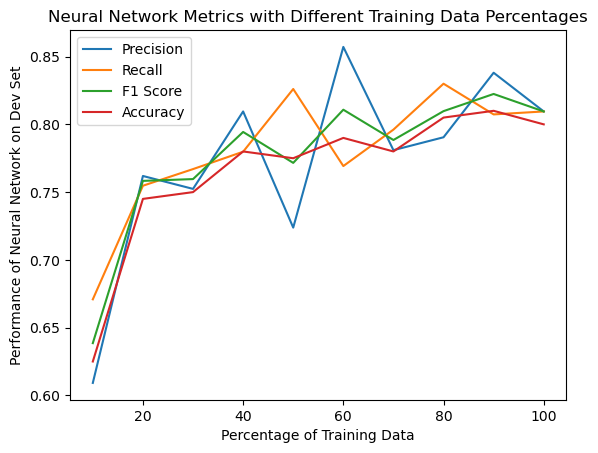

In [12]:
plt.plot([i for i in range(10, 101, 10)], [x[0] for x in eval_data], label="Precision")
plt.plot([i for i in range(10, 101, 10)], [x[1] for x in eval_data], label="Recall")
plt.plot([i for i in range(10, 101, 10)], [x[2] for x in eval_data], label="F1 Score")
plt.plot([i for i in range(10, 101, 10)], [x[3] for x in eval_data], label="Accuracy")

plt.legend()

plt.xlabel("Percentage of Training Data")
plt.ylabel("Performance of Neural Network on Dev Set")
plt.title("Neural Network Metrics with Different Training Data Percentages")
plt.show()

Report the f1 scores for your model with the following settings, using the same number of epochs to train in both cases:
- number of epochs used: __50__
- multinomial features: __0.8127853881278538__ 
- binarized features: __0.8055555555555556__